**Housing Price Predictor**

This project will help us use machine learning to predict housing prices based on features such as year built, square footage, lot size, etc.

Upload Files to Project

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HousePricePrediction.xlsx to HousePricePrediction.xlsx


In [ ]:
import pandas as pd

df = pd.read_excel('HousePricePrediction.xlsx')
print(df.head())

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


Add imports

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

**Data Preprocessing**

Categorize data based on the data type

In [ ]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)

integers = (df.dtypes == 'int')
num_cols = list(integers[integers].index)

floats = (df.dtypes == 'float')
float_cols = list(floats[floats].index)

**EDA**

<Axes: >

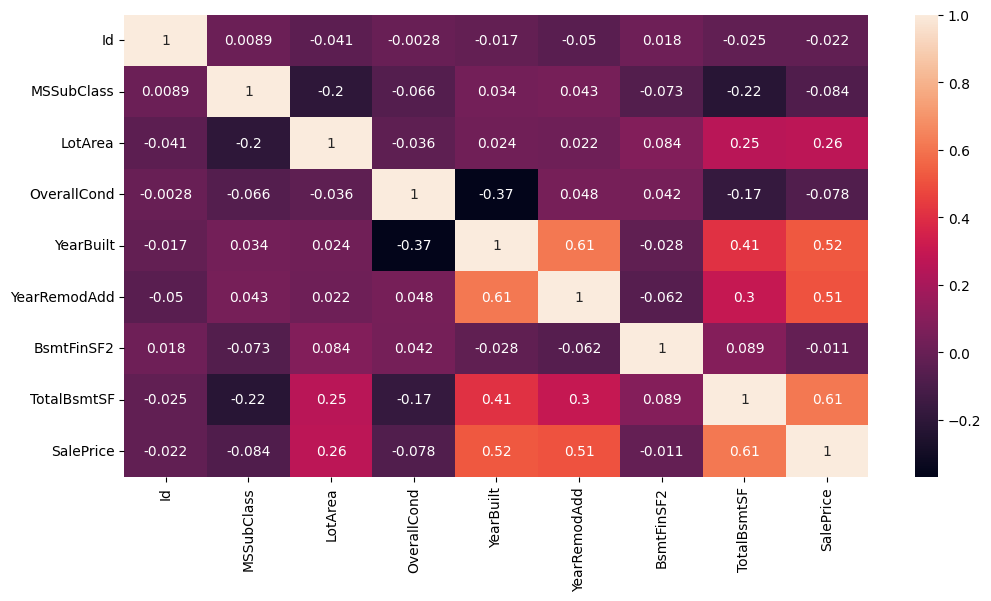

In [ ]:
numerical_dataset = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(), annot = True)

**Data Cleaning**

Now we want to remove irrelevant data that is not useful for model training.

In [ ]:
df.drop(['Id'], axis=1, inplace=True)

# Replacing SalePrice empty values with their mean values to make the data distribution symmetric.
df['SalePrice'] = df['SalePrice'].fillna(df['SalePrice'].mean())

# Drop records with null values. Then check
new_dataset = df.dropna()
new_dataset.isnull().sum()

,0
MSSubClass,0
MSZoning,0
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0
BsmtFinSF2,0


**Label Categorical Features**

Now we can use one of the sklearn libraries to convert categorical data into binary vectors. This maps the values to integers.

In [ ]:
s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


Apply OneHotEncoding to whole list

In [ ]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

**Split Data into Training vs. Testing**


In [ ]:
# Y is the saleprice, X are the other columns
X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

**SVM for Model Training and Accuracy**

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1870512931870423
